# Mode shapes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dataloader_halogaland.dataloader as dl
from dataloader_halogaland.plot import plotModeShape, plotModeShapeFEM
import os
from strid.utils import modal_assurance_criterion
from trace import ModeTrace, plotModeShapeAOMA
import koma.modal as modal

/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load results from FEM model

In [2]:
FEM_loader = dl.FEM_result_loader(path=os.getcwd()+ '/../../../FEM/HalogalandModel_exportmodal.h5')

FEM_modes = FEM_loader.get_all_modes()
f= FEM_loader.f
phis_FEM = FEM_loader.phi
print(type(FEM_modes[0]))

<class 'dataloader_halogaland.dataloader.Mode'>


In [3]:
print(FEM_loader.phi_z.shape)

(573, 20)


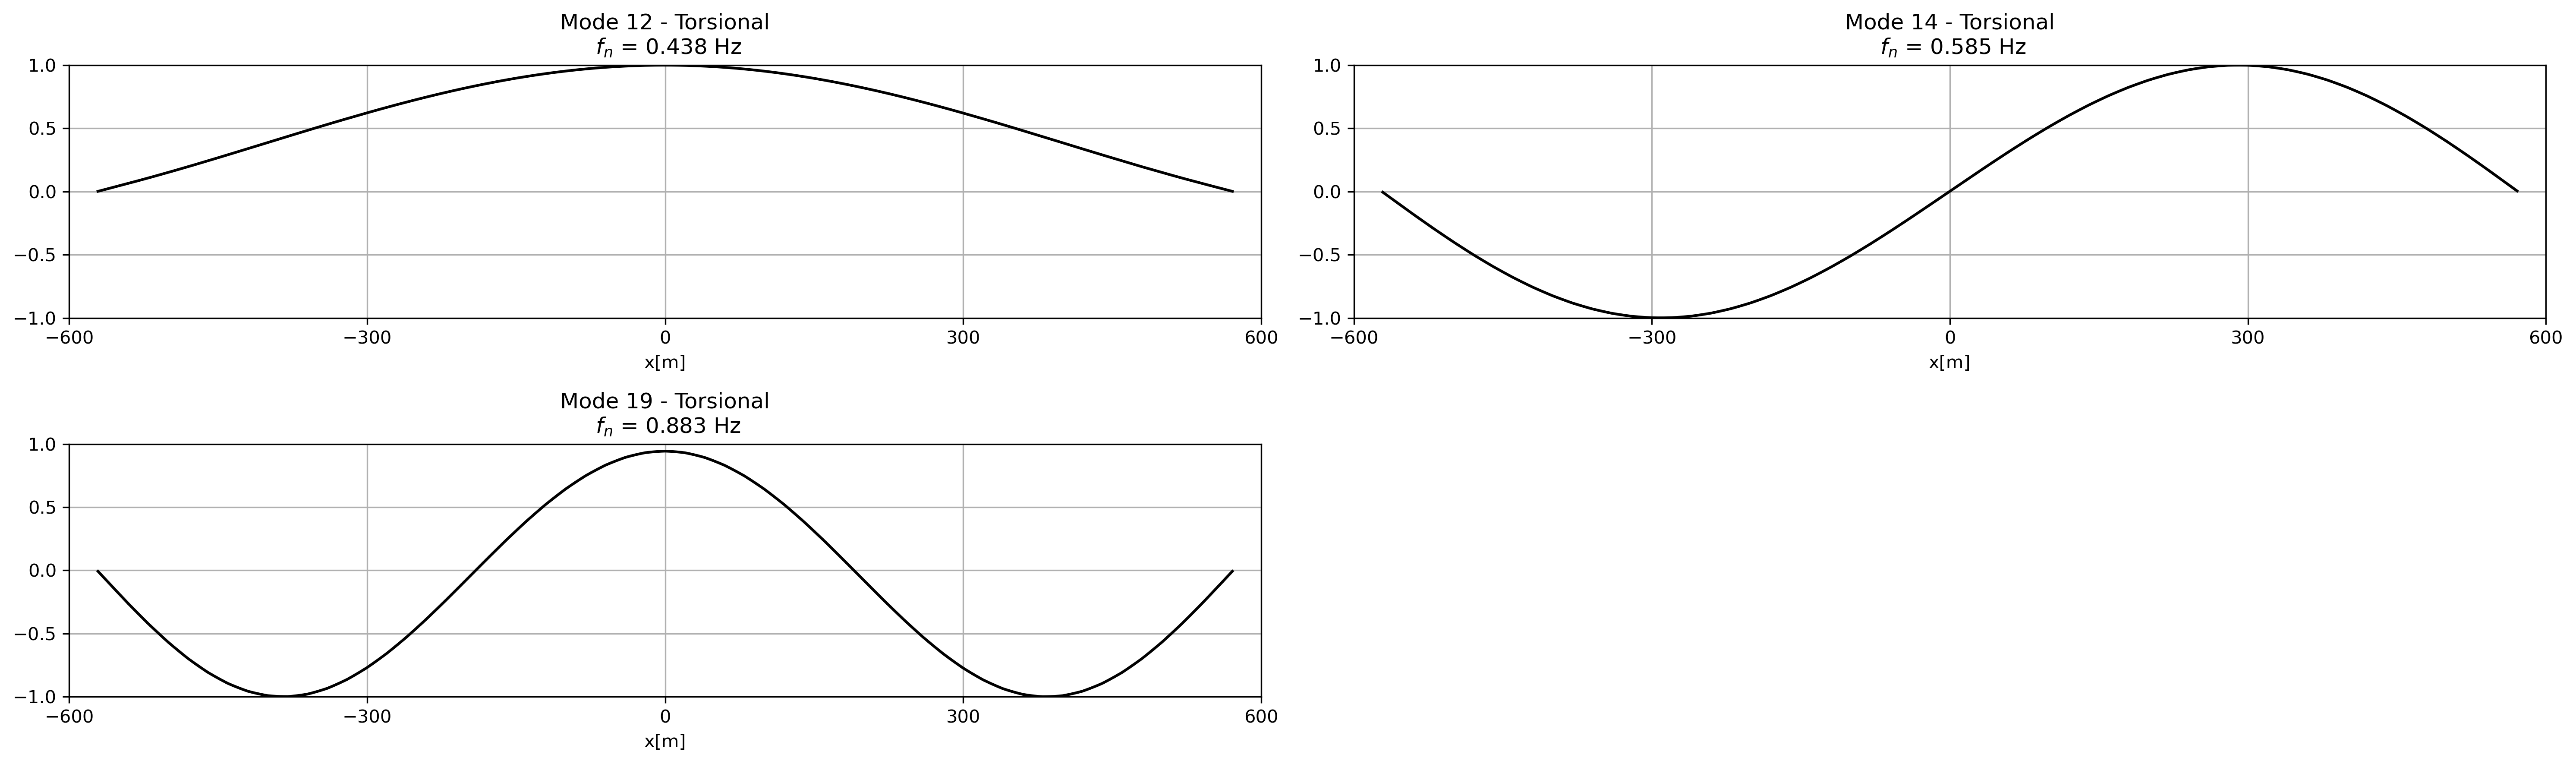

In [6]:
mode_type = 'Torsional'
plotModeShapeFEM(FEM_loader, mode_type)
plt.savefig('plots/modeshapes_FEM_'+ mode_type + '.jpg')

### Load results from AOMA

In [4]:
AOMA_loader = dl.HDF5_result_loader(path=os.getcwd()+'/../Referencebased_Cov-SSI/results/output_AOMA_stab_crit_high.h5')

In [5]:
all_modes = AOMA_loader.get_modes_all_periods()
temps, mean_wind_speed, max_wind_speed, mean_wind_direction, execution_time = AOMA_loader.get_statistics()

In [6]:
# Analyse mode traces
tracer = ModeTrace(FEM_modes[:20], len(all_modes))
tracer.add_all_modes(all_modes)

/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/modal.py:140: RuntimeWarning: overflow encountered in square
  max_angle_ix = np.argmax(np.sum(np.real(rot_mode)**2,axis=0), axis=0)
/Users/emilneby/PyCharmProjects/AOMA_Halogaland/src/AOMA/Result_exploration/trace.py:234: RuntimeWarning: overflow encountered in add
  phi_y = (modal.maxreal((phi_y[::2, :] + phi_y[1::2, :]) / 2))
/Users/emilneby/PyCharmProjects/AOMA_Halogaland/src/AOMA/Result_exploration/trace.py:234: RuntimeWarning: invalid value encountered in add
  phi_y = (modal.maxreal((phi_y[::2, :] + phi_y[1::2, :]) / 2))
/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/modal.py:142: RuntimeWarning: invalid value encountered in multiply
  phi_max_real[:, mode] = phi[:, mode] * np.exp(angles[0, max_angle_ix]*1j)*np.sign(

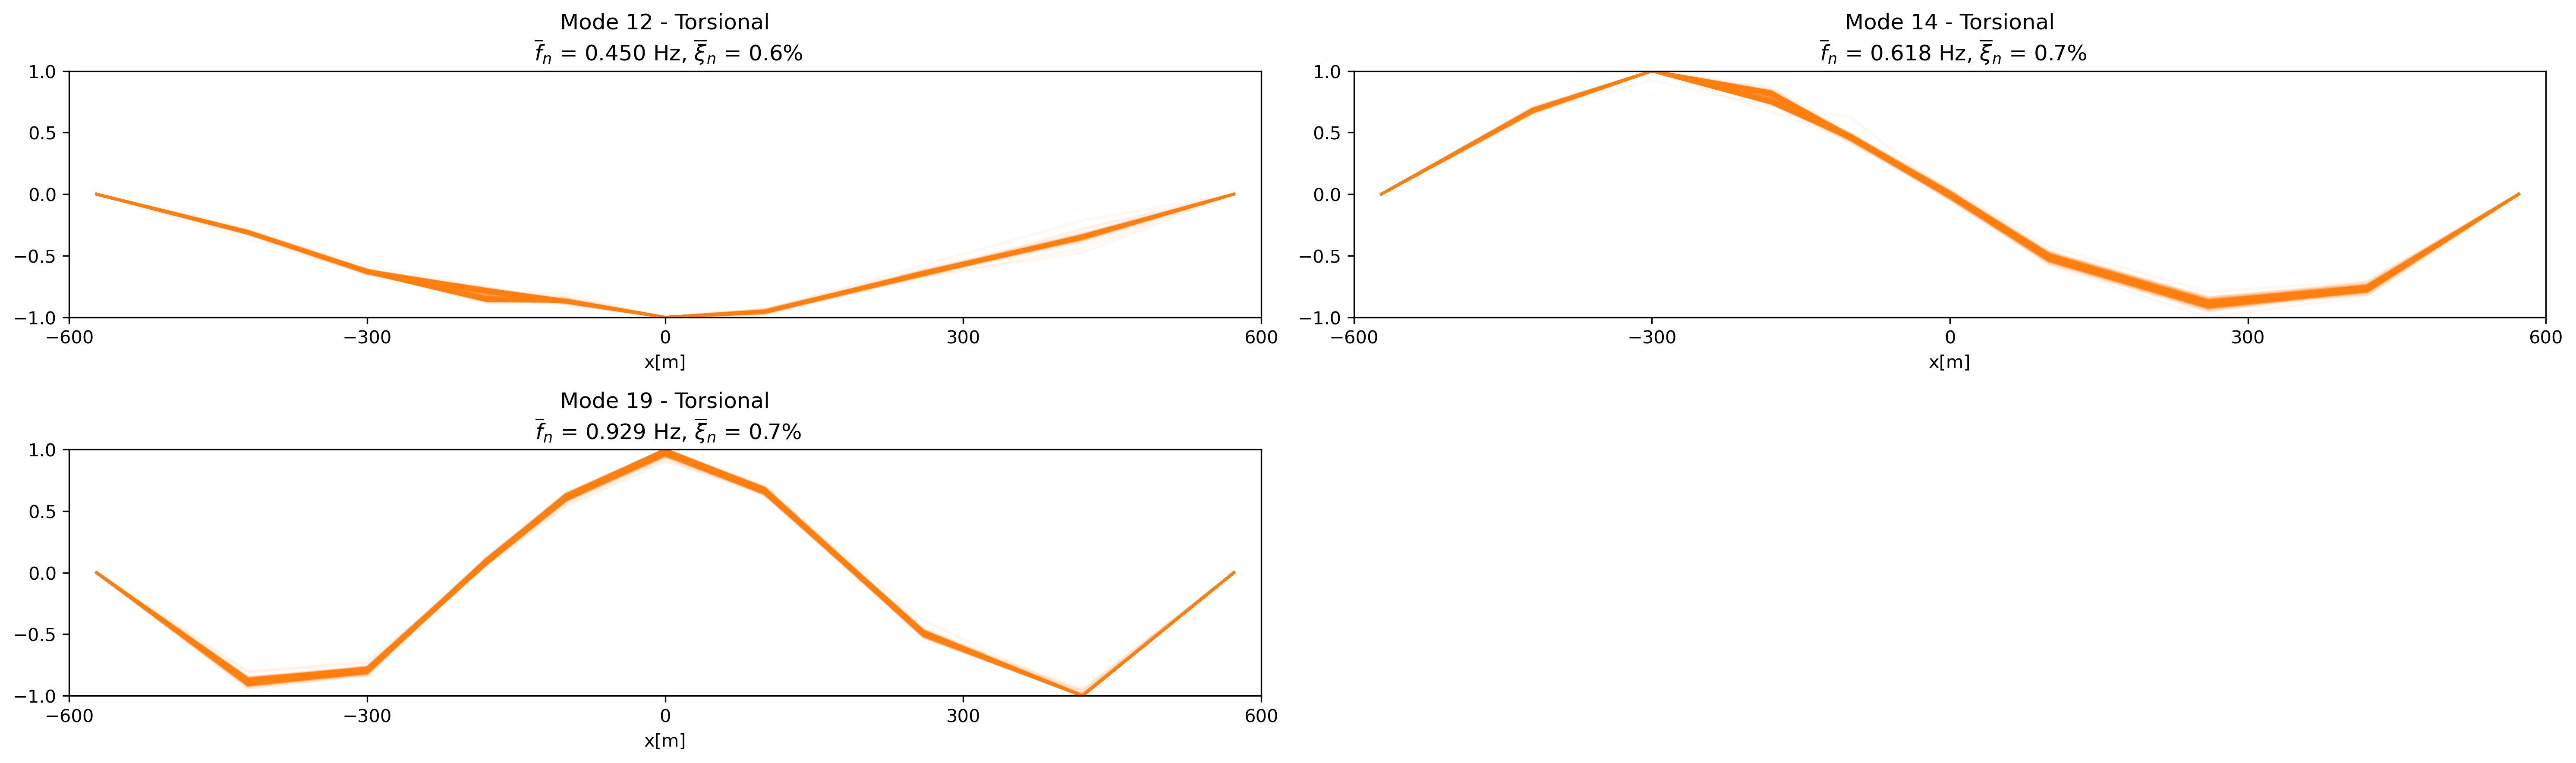

In [8]:
mode_type = 'Torsional'
plotModeShapeAOMA(tracer, type=mode_type)
plt.savefig('plots/modeshapes_AOMA_' + mode_type + '.jpg')